In [102]:
# Install matplotlib and scipy for this
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm, poisson
import numpy as np

In [119]:
def calc_n_plot_critical_ratio(p, c, r, mean, std):
    cu = p - c
    co = c - r
    rho = cu / (cu + co)
    print(f"Cost of underage is {cu}")
    print(f"Cost of overage is {co}")
    print(f"Critical ratio is {np.round(rho, 2)}")
    
    m = mean
    s = std
    qty = norm.ppf(rho, 
                  loc=m, 
                  scale=s)
    print(f"Optimal order qty is {qty}")
    x = np.linspace(norm.ppf(0.01,
                             loc=m,
                             scale=s
                             ),
                     norm.ppf(0.99,
                              loc=m,
                              scale=s
                             ), 
                     10000)
    yp = norm.pdf(x, loc=m, scale=s)
    yc = norm.cdf(x, loc=m, scale=s)
    lp = "Normal pdf"
    lc = "Normal cdf"
    
    fig, ax = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(15)
    ax.set_xlim(x[0], x[-1])
    ax.set_ylim(0, 1.1)
    ax.plot(x, yp,
       'b--', lw=3, alpha=0.6, label=lp)
    ax.plot(x, yc,
       'b-', lw=3, alpha=0.6, label=lc)
    ax.plot([qty, qty], 
            [0, rho], 
            "k", lw=0.8)
    ax.plot([0, qty], 
            [rho, rho], 
            "k", lw=0.8)
    ax.fill_between(x, 0, yp, where=x <= qty,
                 facecolor='cornflowerblue', interpolate=True)
    ax.legend(loc='best', frameon=False)
    matplotlib.rc('axes', titlesize=22)
    plt.rcParams.update({'font.size': 22})
    plt.show()    

Cost of underage is 1600
Cost of overage is 400
Critical ratio is 0.8
Optimal order qty is 24.20810616786457


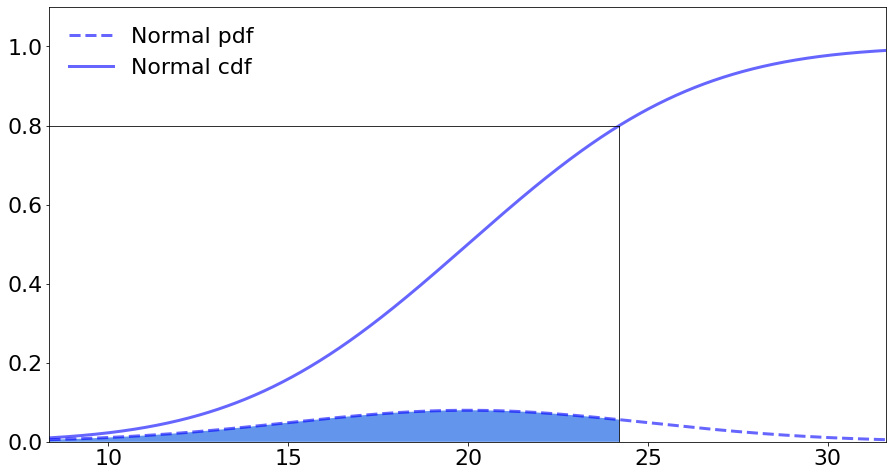

In [132]:
p = 2000
c = 400
r = 0
calc_n_plot_critical_ratio(p, c, r, mean=20, std=5)